# Examen Final - Python para Ciencia de Datos

Se espera que escriba el código en Python utilizando solo funciones y métodos de pandas.

# Dataset:

1. edad (age)
2. sexo (sex)
3. tipo de dolor torácico (4 valores) (chest pain type (4 4.values))
4. presión arterial basal (resting blood pressure)
5. colesterol sérico en mg/dL (serum cholesterol in mg/dL)
6. glucemia en ayunas > 120 mg/dL (fasting blood sugar > 120 mg/dL)
7. resultados del electrocardiograma en reposo (valores 0,1,2) (resting electrocardiographic results (values 0,1,2))
frecuencia cardíaca máxima alcanzada (maximum heart rate achieved)
8. angina inducida por ejercicio (exercise induced angina)
oldpeak = depresión del ST inducida por ejercicio en relación con el reposo (oldpeak = ST depression induced by exercise relative to rest)
9. pendiente del segmento ST del ejercicio pico (the slope of the peak exercise ST segment)
número de vasos principales (0-3) coloreados por fluoroscopia (number of major vessels (0-3) colored by flourosopy)
10. thal: 0 = normal; 1 = defecto fijo; 2 = defecto reversible (thal: 0 = normal; 1 = fixed defect; 2 = reversable defect)







Pueden descargar el archivo desde el siguiente link:

https://drive.google.com/file/d/1dQjd-ykxJidP3U1RoywnaqX0puj3PWrF/view?usp=sharing


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
url = "https://raw.githubusercontent.com/NelbaBarreto/programacion-ciencias-datos/main/data/heart.csv"

df = pd.read_csv(url)

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Ejercicio 1: Datos Faltantes y Dimensiones

Muestra las dimensiones del dataframe.

¿Existen valores nulos en el DataFrame df? Si es así, muestra las columnas que contienen valores nulos.

In [16]:
# Dimensiones del dataframe.
df.shape

(1025, 14)

In [17]:
# Verificar si existen valores nulos
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

Se verifica que no existen valores nulos en ninguna columna.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Ejercicio 2: Estadística Descriptiva
Genera estadísticas descriptivas para las columnas 'age', 'trestbps' y 'thalach'.

In [19]:
df[["age", "trestbps", "thalach"]].describe()

,age,trestbps,thalach
count,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,149.114146
std,9.072290,17.516718,23.005724
min,29.000000,94.000000,71.000000
25%,48.000000,120.000000,132.000000
50%,56.000000,130.000000,152.000000
75%,61.000000,140.000000,166.000000
max,77.000000,200.000000,202.000000


# Ejercicio 3: Renombrar Columnas
Renombra las columnas 'age' a 'Age', 'trestbps' a 'RestingBP', y 'thalach' a 'MaxHeartRate'.

In [20]:
df.rename(columns={"age":"Age", "trestbps":"RestingBP", "thalach":"MaxHeartRate"}, inplace=True)

# Ejercicio 4: Concat
Divide el DataFrame df en dos DataFrames: df1 con las primeras 150 filas y df2 con las filas restantes. Luego, combina estos dos DataFrames de nuevo en uno solo.

In [22]:
df_parte1 = df[:150]
df_parte2 = df[150:]

df_new = pd.concat([df_parte1, df_parte2])

df_new.head()

,Age,sex,cp,RestingBP,chol,fbs,restecg,MaxHeartRate,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1025 non-null   int64  
 1   sex           1025 non-null   int64  
 2   cp            1025 non-null   int64  
 3   RestingBP     1025 non-null   int64  
 4   chol          1025 non-null   int64  
 5   fbs           1025 non-null   int64  
 6   restecg       1025 non-null   int64  
 7   MaxHeartRate  1025 non-null   int64  
 8   exang         1025 non-null   int64  
 9   oldpeak       1025 non-null   float64
 10  slope         1025 non-null   int64  
 11  ca            1025 non-null   int64  
 12  thal          1025 non-null   int64  
 13  target        1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Ejercicio 5: Agregaciones y Groupby
1. Agrupa el DataFrame df por la columna 'cp' y filtra los grupos donde la media de 'RestingBP' sea mayor que 130.

2. Luego, normaliza la columna 'chol' dentro de cada grupo 'cp' utilizando transform. Para eso, debes crear una columna adicional llamada "chol_normalized".

La normalización se debe hacer tomando cada valor de la columna, restar la media del grupo 'cp' al que pertenece y dividir por la desviación estandar del grupo.

In [34]:
# Agrupa el DataFrame df por la columna 'cp' y filtra los grupos donde la media de 'RestingBP' sea mayor que 130
filtered_df = df.groupby("cp").filter(lambda x: x["RestingBP"].mean() > 130)

# Normaliza la columna 'chol' dentro de cada grupo 'cp' utilizando transform
filtered_df['chol_normalized'] = filtered_df.groupby("cp")["chol"].transform(lambda x: (x - x.mean()) / x.std())

# Mostrar el resultado
filtered_df.head()

,Age,sex,cp,RestingBP,chol,fbs,restecg,MaxHeartRate,exang,oldpeak,slope,ca,thal,target,chol_normalized
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,-0.734266
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,-0.908199
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,-1.468649
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,-0.908199
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.850455


# Ejercicio 6: Pivot Tables y Agregaciones
Crea una tabla dinámica (pivot table) que muestre la media de 'MaxHeartRate' para cada valor de 'cp'.

In [35]:
pd.pivot_table(df, index="cp", values="MaxHeartRate", aggfunc="mean")



,MaxHeartRate
cp,
0,140.052314
1,162.179641
2,155.116197
3,157.129870


# Ejercicio 7: qcut y count
1. Divide la columna 'MaxHeartRate' en 4 bins utilizando qcut y cuenta el número de observaciones en cada bin. Muestra los resultados.

2. Usando una función, asigna en una nueva columna de 'MaxHeartRate_label' las etiquetas 'Bajo', 'Medio', 'Alto' y 'Muy Alto', usando el método apply.

Muestre las 10 primeras columnas del dataframe modificado.

In [48]:
# Divide la columna 'MaxHeartRate' en 4 bins utilizando qcut
mhr_qcut = pd.qcut(df["MaxHeartRate"], 4)

# Cuenta el número de observaciones en cada bin
mhr_qcut.value_counts().sort_index()

MaxHeartRate
(70.999, 132.0]    260
(132.0, 152.0]     263
(152.0, 166.0]     253
(166.0, 202.0]     249
Name: count, dtype: int64

In [50]:
# Asigna en una nueva columna de 'MaxHeartRate_label' las etiquetas 'Bajo', 'Medio', 'Alto' y 'Muy Alto', usando el método apply
def asignar_etiqueta(x):
    if x < 132:
      return "Bajo"
    elif x < 152:
      return "Medio"
    elif x < 166:
      return "Alto"
    else:
      return "Muy Alto"

# Aplicar la función a cada fila para crear una nueva columna 'MaxHeartRate_label'
df["MaxHeartRate_label"] = df["MaxHeartRate"].apply(asignar_etiqueta)

# Mostrar las 10 primeras columnas del dataframe modificado
df.head(10)


,Age,sex,cp,RestingBP,chol,fbs,restecg,MaxHeartRate,exang,oldpeak,slope,ca,thal,target,MaxHeartRate_label
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Muy Alto
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Alto
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Bajo
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Alto
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Bajo
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Bajo
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,Medio
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,Medio
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,Medio
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,Bajo


# Ejercicio 8: Métodos de String
Convierte todos los nombres de columnas a mayúsculas.


In [52]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['age', 'sex', 'cp', 'restingbp', 'chol', 'fbs', 'restecg',
       'maxheartrate', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target',
       'maxheartrate_label'],
      dtype='object')


# Ejercicio 9: Visualización
Crea un gráfico de dispersión (scatter plot) de 'AGE' vs 'MAXHEARTRATE' usando Pandas. ¿Qué sugiere el gráfico?

<Axes: xlabel='age', ylabel='maxheartrate'>

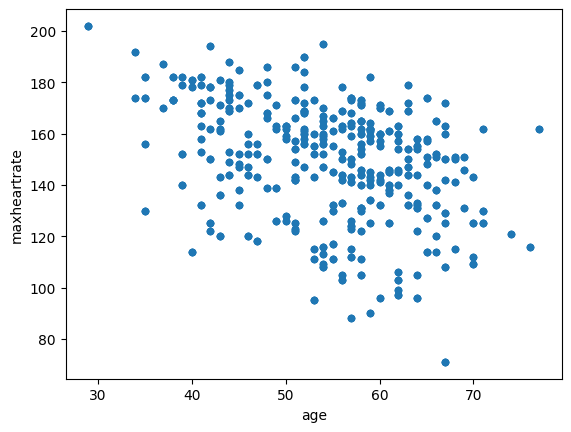

In [53]:
df.plot.scatter(x="age", y="maxheartrate")

Existen outliers en los datos de heart rate, tanto muy bajos como muy altos. Las personas mayores de 50 tienen un rango de valores de heart rate más amplia que los menores de 50.
Casi todas las personas con heart rate menor a 120 son mayores a 50 años.

# Ejercicio 10: Matplotlib y Subplots
Crea un histograma de la columna 'RESTINGBP' y un gráfico de barras de la columna 'CP' en un solo subplot utilizando Matplotlib.

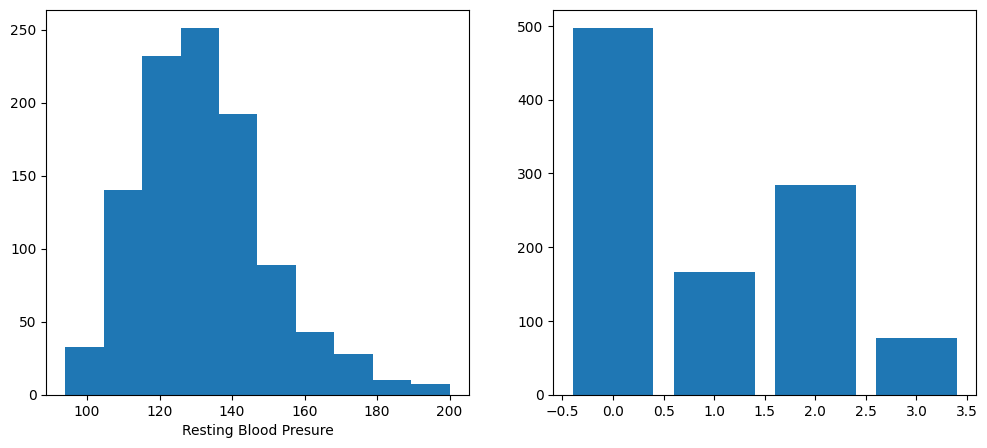

In [57]:
# Crea dos gráficos en una sola figura
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Un histograma de la columna 'RESTINGBP'
ax[0].hist(df["restingbp"])
ax[0].set_xlabel("Resting Blood Presure")

# Un gráfico de barras de la columna 'CP'
cp = df["cp"].value_counts()
ax[1].bar(x=cp.index, height=cp)

plt.show()

# Ejercicio 11: Clusterización por K-means y Método del Codo
Aplica K-means al DataFrame df para agrupar los datos en 3 clusters usando las columnas 'AGE' y 'MAXHEARTRATE'. Los datos deben estar escalados.

Luego asigna los resultados del cluster al df a una columna llamada 'cluster'.


En un gráfico de dispersión, entre 'AGE' y 'MAXHEARTRATE', etiqueta a los pacientes utilizando el número de cluster al que pertenecen. Además, muestra el centroide de cada cluster.

In [61]:
# Normaliza las características del dataset utilizando StandardScaler de sklearn.
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Transformar todo el dataframe (usando la estandarización)
scaled_features = scaler.fit_transform(df[["age", "maxheartrate"]])

In [62]:
# Instanciamos un objeto de la clase KMeans con 3 clusters
kmeans = KMeans(init="random", n_clusters=3)

# Ajustar los datos en scaled_features
kmeans.fit(scaled_features)

df["cluster"] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,age,sex,cp,restingbp,chol,fbs,restecg,maxheartrate,exang,oldpeak,slope,ca,thal,target,maxheartrate_label,cluster
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Muy Alto,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Alto,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Bajo,2
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Alto,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Bajo,2


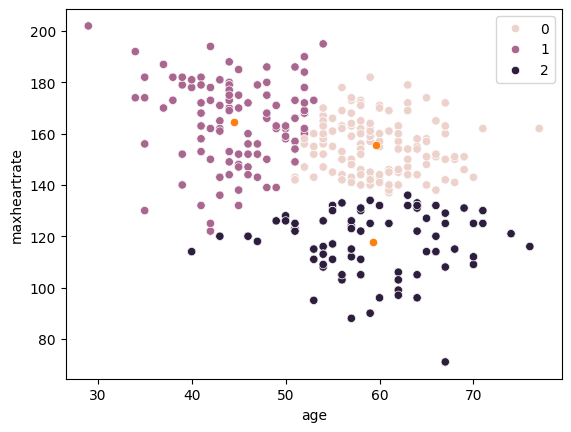

In [64]:
# Obtener los centroides
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

# En un gráfico de dispersión, entre 'AGE' y 'MAXHEARTRATE', etiqueta a los
# pacientes utilizando el número de cluster al que pertenecen.
# Además, muestra el centroide de cada cluster.
ax = sns.scatterplot(data=df, x="age", y="maxheartrate", hue="cluster")
sns.scatterplot(x=cen_x, y=cen_y, ax=ax)

plt.show()


#Ejercicio 12: Método del codo
Utiliza el método del codo para determinar el número óptimo de clusters para estas columnas.

Se debe mostrar el gráfico para los resultados del método del codo.



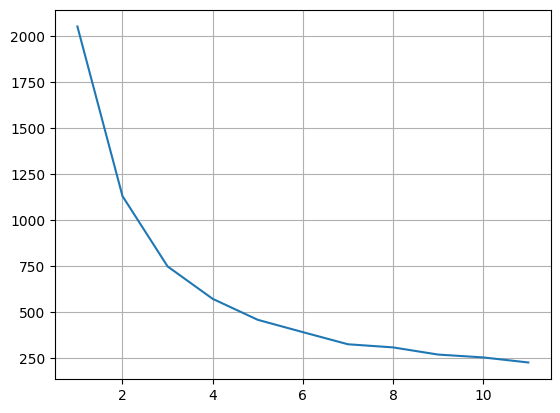

In [66]:
K = range(1, 12)
sse = []

for k in K:
  # Entrenar el modelo para cada valor de k
  model = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(scaled_features)

  sse.append(model.inertia_)

sns.lineplot(x=K, y=sse)
plt.grid()
plt.show()

El número óptimo de clusters para el modelo es de 3.

In [67]:
!pip install kneed

In [70]:
from kneed import KneeLocator
kl = KneeLocator(range(1,12), sse, curve="convex", direction="decreasing")
kl.elbow

3

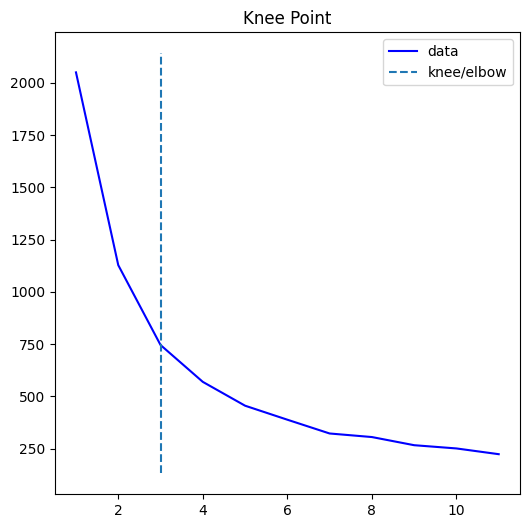

In [71]:
kl.plot_knee()